In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Updated data for the reference implementation (blue bars)
avg_sq_err_sv = np.array([0.000000, 0.000000, 0.000000]) + 1e-20
min_sq_err_sv = np.array([0.000000, 0.000000, 0.000000]) + 1e-20
max_sq_err_sv = np.array([0.000000, 0.000000, 0.000000]) + 1e-20

avg_sq_err_lsv = np.array([0.000199, 0.000203, 0.000200])
min_sq_err_lsv = np.array([0.000194, 0.000197, 0.000194])
max_sq_err_lsv = np.array([0.000206, 0.000210, 0.000207])

avg_sq_err_rsv = np.array([0.001991, 0.002025, 0.002002])
min_sq_err_rsv = np.array([0.001943, 0.001972, 0.001939])
max_sq_err_rsv = np.array([0.002056, 0.002098, 0.002069])

avg_berr = np.array([1.015463e-15, 4.209461e-15, 4.540017e-15])
min_berr = np.array([9.846357e-16, 1.283113e-15, 1.234705e-15])
max_berr = np.array([1.058940e-15, 8.336287e-15, 9.313326e-15])

avg_max_orth_err = np.array([2.086827e-16, 2.098398e-16, 2.109906e-16])
min_max_orth_err = np.array([2.083258e-16, 2.093548e-16, 2.105428e-16])
max_max_orth_err = np.array([2.093014e-16, 2.101395e-16, 2.116806e-16])

avg_backward_err = np.array([2.460396e-15, 2.170033e-15, 2.806517e-15])
min_backward_err = np.array([2.145322e-15, 1.995269e-15, 2.199608e-15])
max_backward_err = np.array([2.817470e-15, 2.445158e-15, 4.042112e-15])

avg_iterations = [5.0, 5.0, 5.0]
min_iterations = [5.0, 5.0, 5.0]
max_iterations = [5.0, 5.0, 5.0]

condition_numbers_log = [3, 6, 9]


# Convert data to logarithmic scale
log_avg_sq_err_sv = np.log10(avg_sq_err_sv)
log_min_sq_err_sv = np.log10(min_sq_err_sv)
log_max_sq_err_sv = np.log10(max_sq_err_sv)

log_avg_sq_err_lsv = np.log10(avg_sq_err_lsv)
log_min_sq_err_lsv = np.log10(min_sq_err_lsv)
log_max_sq_err_lsv = np.log10(max_sq_err_lsv)

log_avg_sq_err_rsv = np.log10(avg_sq_err_rsv)
log_min_sq_err_rsv = np.log10(min_sq_err_rsv)
log_max_sq_err_rsv = np.log10(max_sq_err_rsv)

log_avg_berr = np.log10(avg_berr)
log_min_berr = np.log10(min_berr)
log_max_berr = np.log10(max_berr)

log_avg_max_orth_err = np.log10(avg_max_orth_err)
log_min_max_orth_err = np.log10(min_max_orth_err)
log_max_max_orth_err = np.log10(max_max_orth_err)

log_avg_backward_err = np.log10(avg_backward_err)
log_min_backward_err = np.log10(min_backward_err)
log_max_backward_err = np.log10(max_backward_err)

new_avg_sq_err_sv = np.array([0.000000, 0.000000, 0.000000]) + 1e-20
new_min_sq_err_sv = np.array([0.000000, 0.000000, 0.000000]) + 1e-20
new_max_sq_err_sv = np.array([0.000000, 0.000000, 0.000000]) + 1e-20

new_avg_sq_err_lsv = np.array([0.000201, 0.000200, 0.000199])
new_min_sq_err_lsv = np.array([0.000192, 0.000192, 0.000186])
new_max_sq_err_lsv = np.array([0.000207, 0.000207, 0.000210])

new_avg_sq_err_rsv = np.array([0.002009, 0.001995, 0.001994])
new_min_sq_err_rsv = np.array([0.001924, 0.001922, 0.001860])
new_max_sq_err_rsv = np.array([0.002073, 0.002072, 0.002105])

new_avg_berr = np.array([1.187434e-15, 1.448935e-15, 1.391729e-15])
new_min_berr = np.array([1.149151e-15, 1.376728e-15, 1.260036e-15])
new_max_berr = np.array([1.210660e-15, 1.598376e-15, 1.584312e-15])

new_avg_max_orth_err = np.array([1.046570e-15, 1.062712e-15, 1.074965e-15])
new_min_max_orth_err = np.array([1.028356e-15, 1.038485e-15, 1.056685e-15])
new_max_max_orth_err = np.array([1.059953e-15, 1.075208e-15, 1.089953e-15])

new_avg_backward_err = np.array([1.714944e-13, 4.586131e-13, 5.640666e-13])
new_min_backward_err = np.array([6.278211e-14, 1.511056e-13, 1.946400e-13])
new_max_backward_err = np.array([3.192939e-13, 9.580876e-13, 1.619860e-12])

new_avg_iterations = [5.0, 5.0, 5.0]
new_min_iterations = [5.0, 5.0, 5.0]
new_max_iterations = [5.0, 5.0, 5.0]

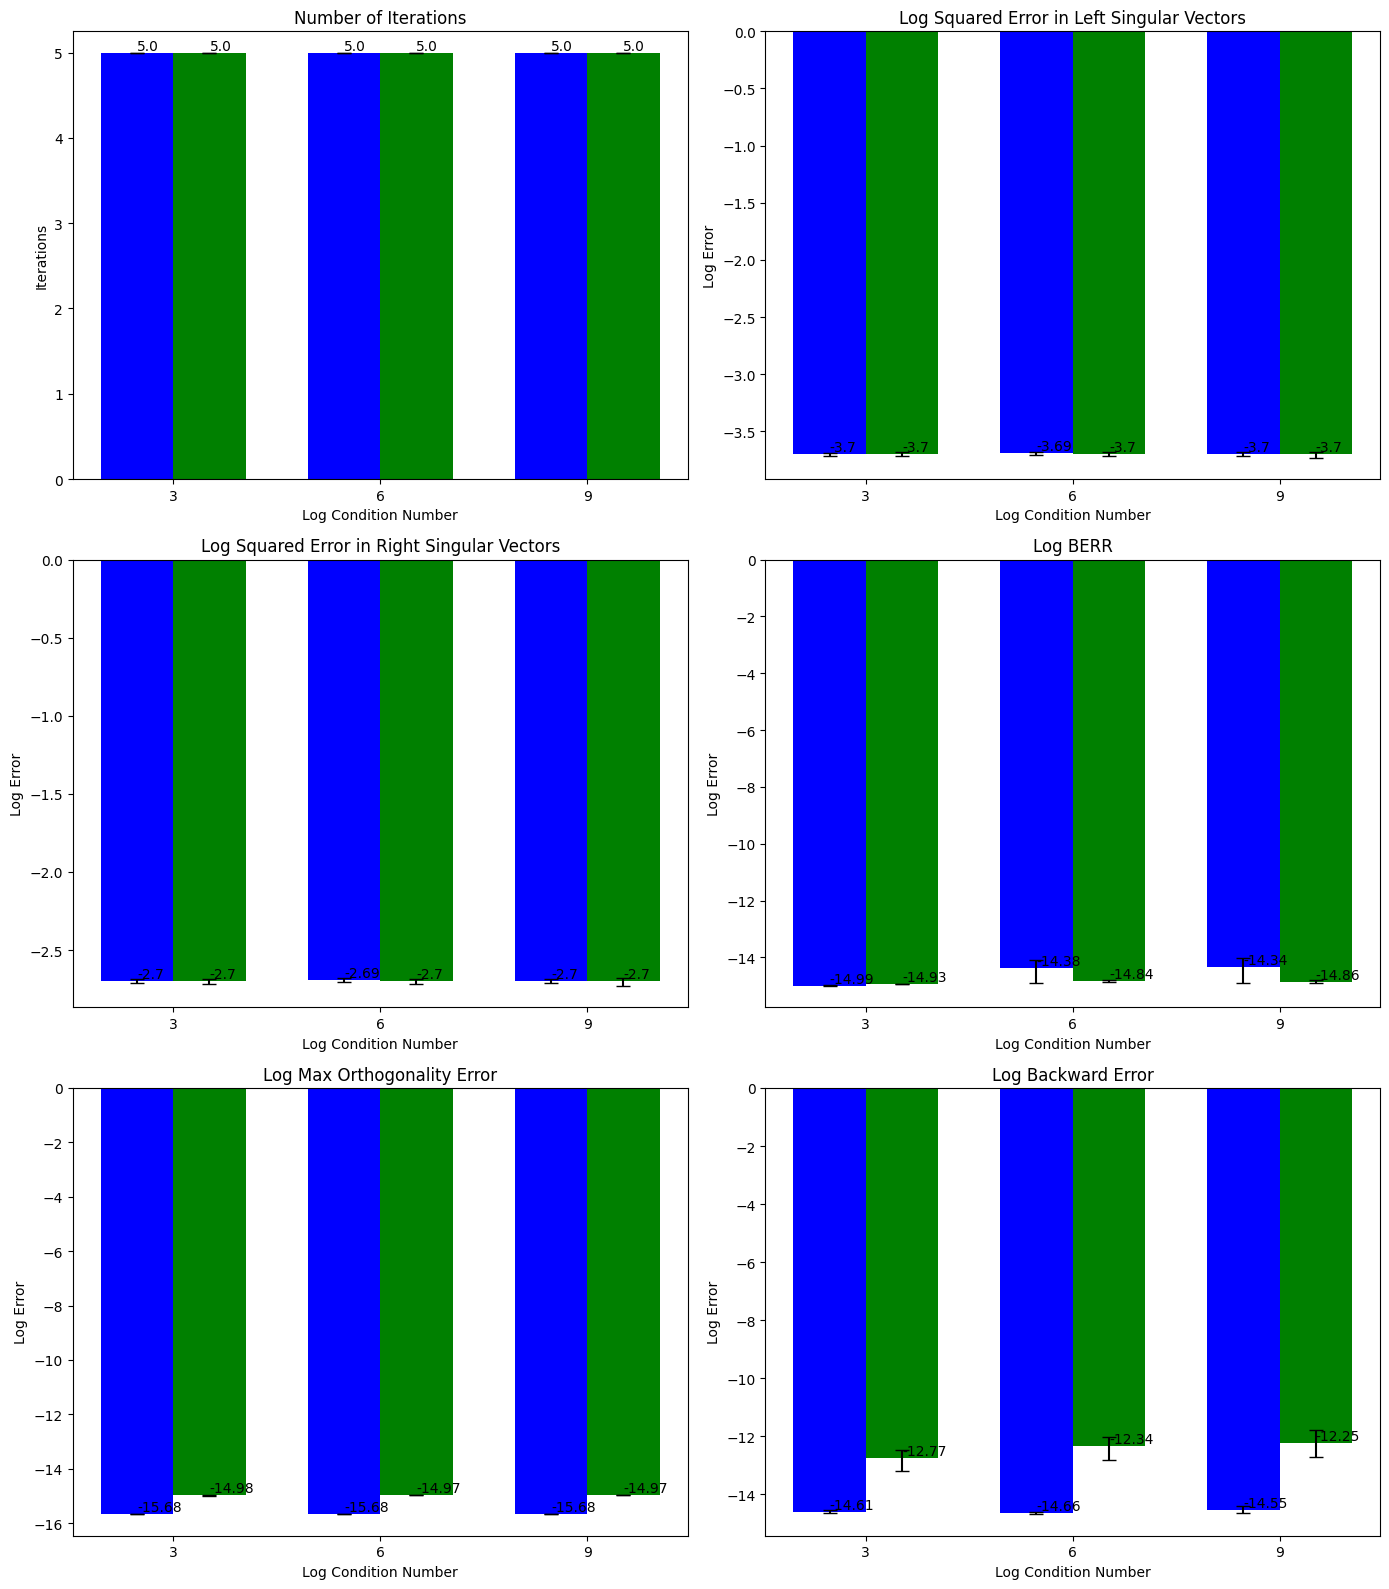

In [6]:
# Create subplots with an additional plot for number of iterations
fig, axs = plt.subplots(3, 2, figsize=(14, 16))

bar_width = 0.35  # width of the bars
indices = np.arange(len(condition_numbers_log))  # the label locations

# Function to plot the bar charts side by side
def plot_side_by_side(ax, x, y1, yerr1, y2, yerr2, label1, label2):
    bars1 = ax.bar(x - bar_width/2, y1, bar_width, yerr=yerr1, capsize=5, label=label1, color='blue')
    bars2 = ax.bar(x + bar_width/2, y2, bar_width, yerr=yerr2, capsize=5, label=label2, color='green')
    ax.set_xticks(x)
    ax.set_xticklabels(condition_numbers_log)
    
    # Add text annotations for the averages on the bars
    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# # Plotting with error bars in logarithmic scale
# plot_side_by_side(axs[0, 0], indices, log_avg_sq_err_sv, [np.subtract(log_avg_sq_err_sv, log_min_sq_err_sv), np.subtract(log_max_sq_err_sv, log_avg_sq_err_sv)], 
#                   np.log10(new_avg_sq_err_sv), [np.subtract(np.log10(new_avg_sq_err_sv), np.log10(new_min_sq_err_sv)), np.subtract(np.log10(new_max_sq_err_sv), np.log10(new_avg_sq_err_sv))],
#                   'Reference', 'Current')
# axs[0, 0].set_title('Log Squared Error in Singular Values')
# axs[0, 0].set_ylabel('Log Error')
# axs[0, 0].set_xlabel('Log Condition Number')

plot_side_by_side(axs[0, 1], indices, log_avg_sq_err_lsv, [np.subtract(log_avg_sq_err_lsv, log_min_sq_err_lsv), np.subtract(log_max_sq_err_lsv, log_avg_sq_err_lsv)], 
                  np.log10(new_avg_sq_err_lsv), [np.subtract(np.log10(new_avg_sq_err_lsv), np.log10(new_min_sq_err_lsv)), np.subtract(np.log10(new_max_sq_err_lsv), np.log10(new_avg_sq_err_lsv))],
                  'Reference', 'Current')
axs[0, 1].set_title('Log Squared Error in Left Singular Vectors')
axs[0, 1].set_ylabel('Log Error')
axs[0, 1].set_xlabel('Log Condition Number')

plot_side_by_side(axs[1, 0], indices, log_avg_sq_err_rsv, [np.subtract(log_avg_sq_err_rsv, log_min_sq_err_rsv), np.subtract(log_max_sq_err_rsv, log_avg_sq_err_rsv)], 
                  np.log10(new_avg_sq_err_rsv), [np.subtract(np.log10(new_avg_sq_err_rsv), np.log10(new_min_sq_err_rsv)), np.subtract(np.log10(new_max_sq_err_rsv), np.log10(new_avg_sq_err_rsv))],
                  'Reference', 'Current')
axs[1, 0].set_title('Log Squared Error in Right Singular Vectors')
axs[1, 0].set_ylabel('Log Error')
axs[1, 0].set_xlabel('Log Condition Number')

plot_side_by_side(axs[1, 1], indices, log_avg_berr, [np.subtract(log_avg_berr, log_min_berr), np.subtract(log_max_berr, log_avg_berr)], 
                  np.log10(new_avg_berr), [np.subtract(np.log10(new_avg_berr), np.log10(new_min_berr)), np.subtract(np.log10(new_max_berr), np.log10(new_avg_berr))],
                  'Reference', 'Current')
axs[1, 1].set_title('Log BERR')
axs[1, 1].set_ylabel('Log Error')
axs[1, 1].set_xlabel('Log Condition Number')

plot_side_by_side(axs[2, 0], indices, log_avg_max_orth_err, [np.subtract(log_avg_max_orth_err, log_min_max_orth_err), np.subtract(log_max_max_orth_err, log_avg_max_orth_err)], 
                  np.log10(new_avg_max_orth_err), [np.subtract(np.log10(new_avg_max_orth_err), np.log10(new_min_max_orth_err)), np.subtract(np.log10(new_max_max_orth_err), np.log10(new_avg_max_orth_err))],
                  'Reference', 'Current')
axs[2, 0].set_title('Log Max Orthogonality Error')
axs[2, 0].set_ylabel('Log Error')
axs[2, 0].set_xlabel('Log Condition Number')

plot_side_by_side(axs[2, 1], indices, log_avg_backward_err, [np.subtract(log_avg_backward_err, log_min_backward_err), np.subtract(log_max_backward_err, log_avg_backward_err)], 
                  np.log10(new_avg_backward_err), [np.subtract(np.log10(new_avg_backward_err), np.log10(new_min_backward_err)), np.subtract(np.log10(new_max_backward_err), np.log10(new_avg_backward_err))],
                  'Reference', 'Current')
axs[2, 1].set_title('Log Backward Error')
axs[2, 1].set_ylabel('Log Error')
axs[2, 1].set_xlabel('Log Condition Number')

# Plotting number of iterations without log
plot_side_by_side(axs[0, 0], indices, avg_iterations, [np.subtract(avg_iterations, min_iterations), np.subtract(max_iterations, avg_iterations)], 
                  new_avg_iterations, [np.subtract(new_avg_iterations, new_min_iterations), np.subtract(new_max_iterations, new_avg_iterations)],
                  'Reference', 'Current')
axs[0, 0].set_title('Number of Iterations')
axs[0, 0].set_ylabel('Iterations')
axs[0, 0].set_xlabel('Log Condition Number')

# # Remove the empty subplot
# fig.delaxes(axs[3, 1])

# # Add legend
# axs[3, 0].legend(['Reference Implementation', 'Current Implementation'], loc='upper right')

plt.tight_layout()

plt.savefig('figures/7_metrics_five_matrices_10k_x_1k.png')

plt.show()